# exploratory data analysis(loan defaulter)

In [1]:
# imports for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data for analysis
df= pd.read_csv("C:\\exploratory data analysis\\datasets\\applicationdata.csv")

In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# feature selection

In [4]:
df.shape

(307511, 122)

In [5]:
# handling missing values 
# make a data frame to better visualisation
missing_data= pd.DataFrame(df.isnull().sum().sort_values()).reset_index()

In [6]:
missing_data.rename(columns= {"index":"column_name",0:"null_count"},inplace= True)

In [7]:
missing_data.head()

,column_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [8]:
missing_data["missing_pct"]= missing_data.null_count/len(df) *100

In [9]:
missing_data.shape

(122, 3)

In [10]:
missing_feature= [feature for feature in missing_data.column_name[missing_data.missing_pct >= 40]]

In [11]:
# remove all the columns 
df.drop(missing_feature,axis= 1,inplace= True)

In [12]:
df.shape

(307511, 73)

In [13]:
# get all the columns with flag string
flag_column= list(feature for feature in df.columns if feature.startswith("FLAG_"))

In [14]:
flag_column

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
flag_target_column= list(feature for feature in df[flag_column+["TARGET"]])

In [16]:
flag_target_column

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'TARGET']

In [17]:
df[flag_target_column].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_13864\672124059.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


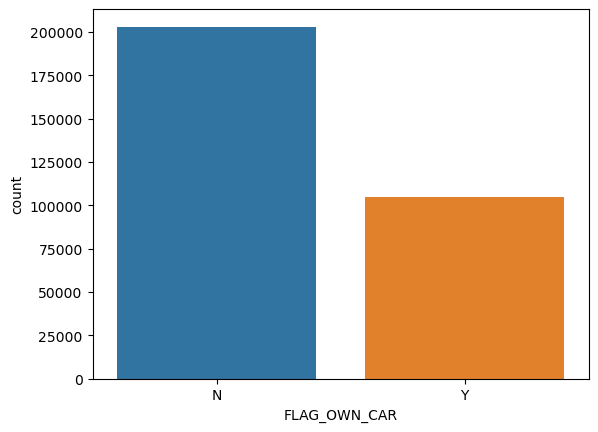

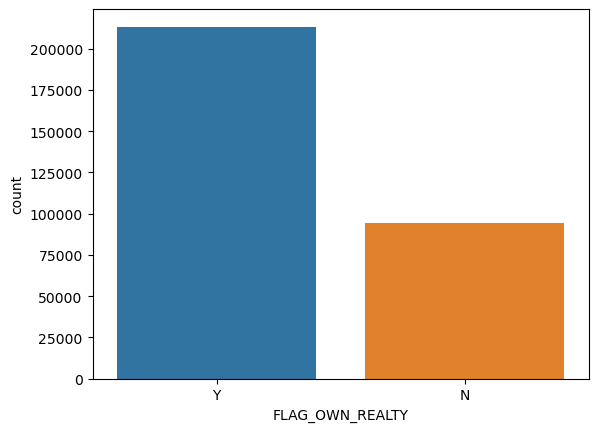

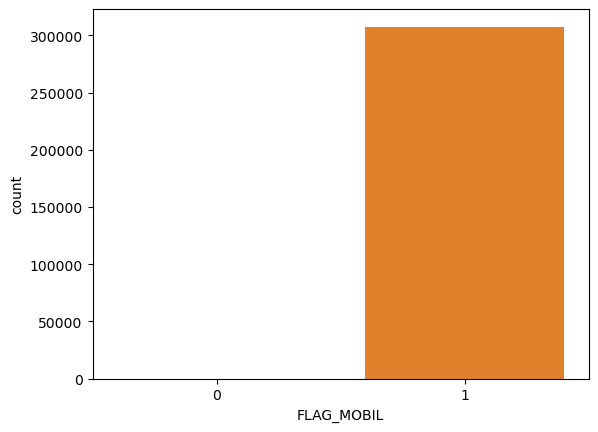

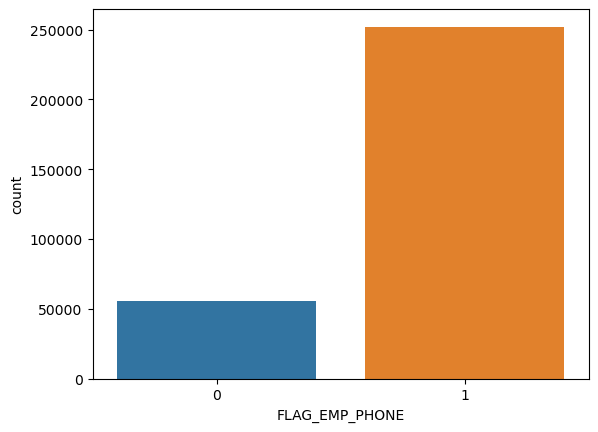

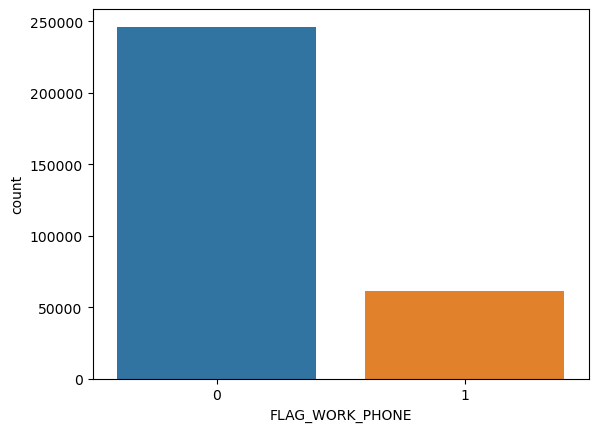

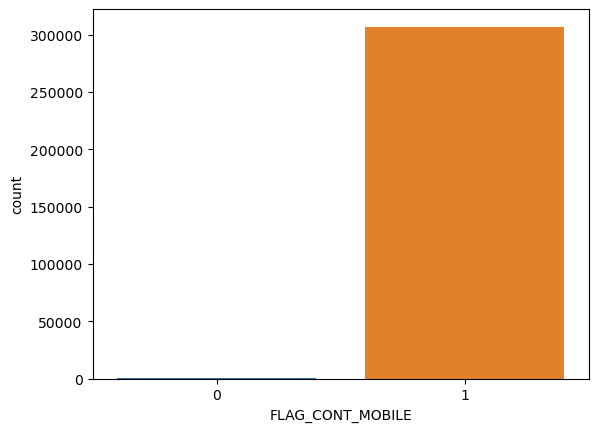

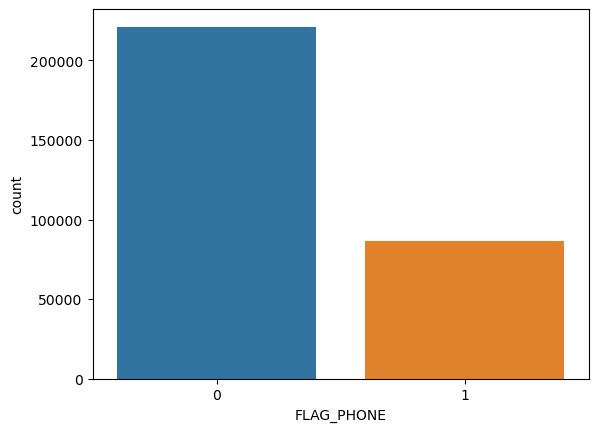

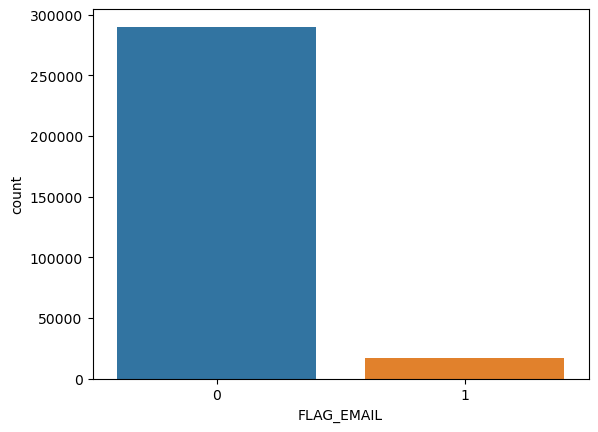

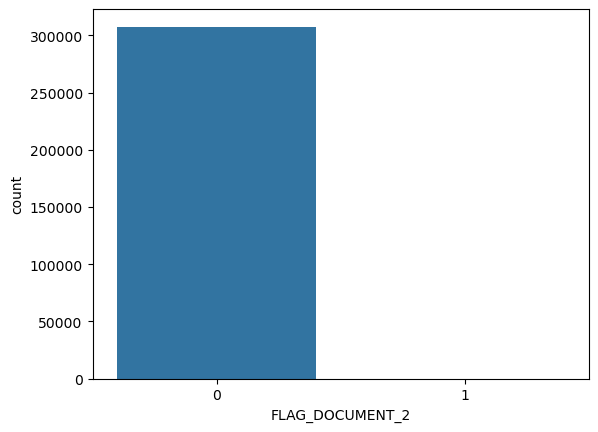

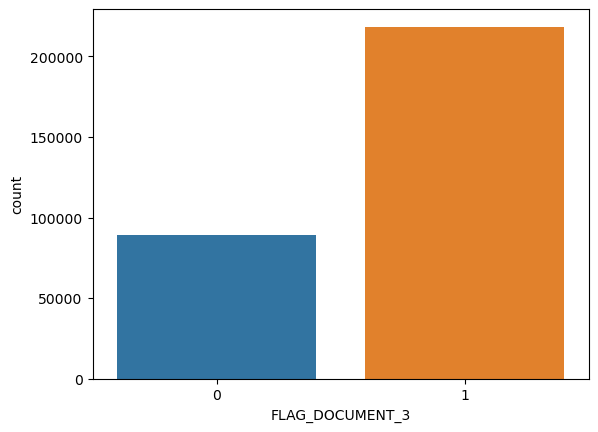

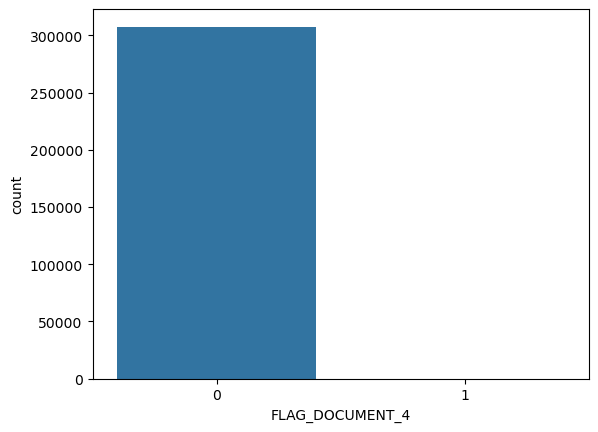

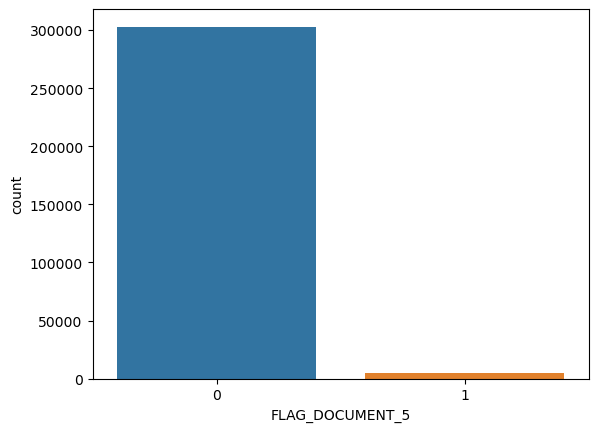

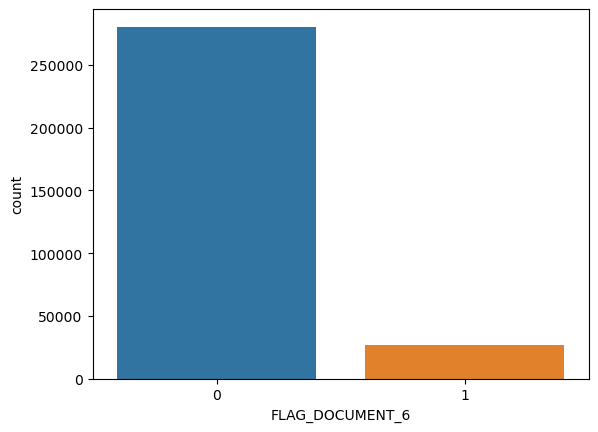

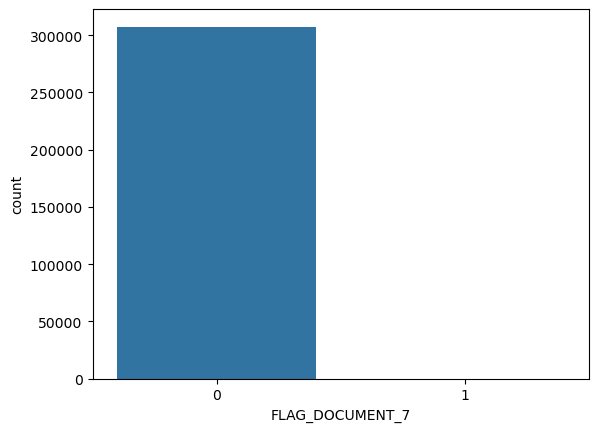

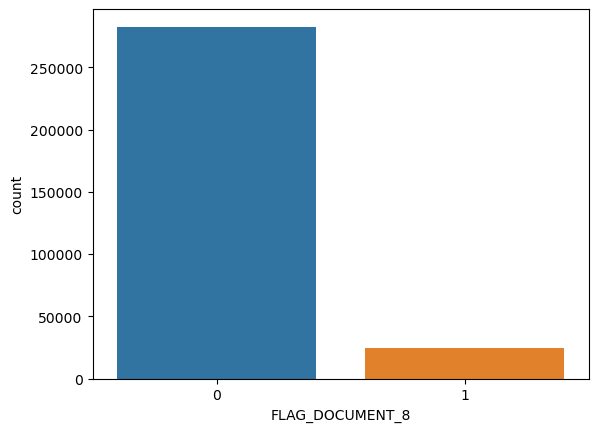

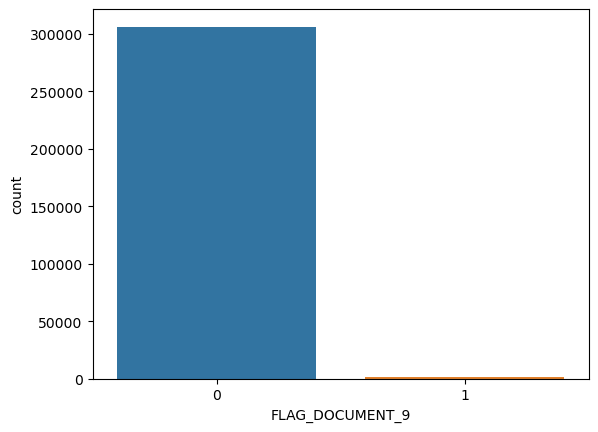

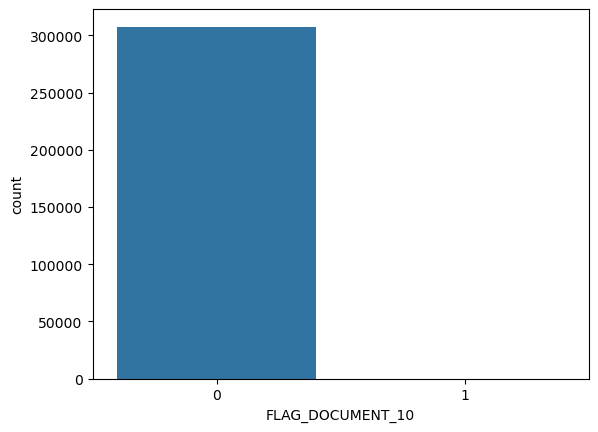

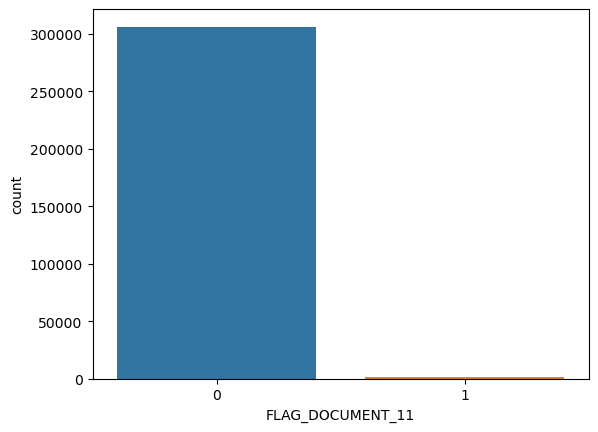

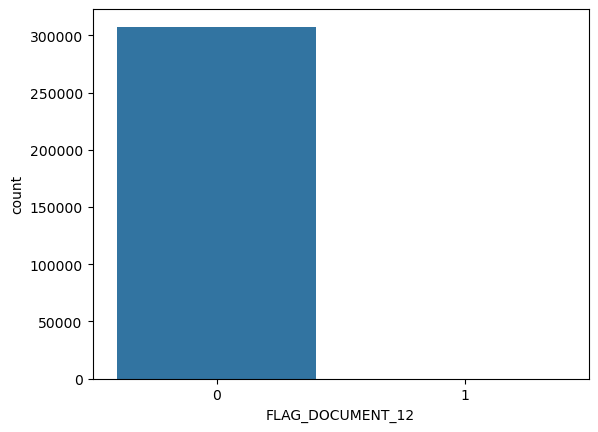

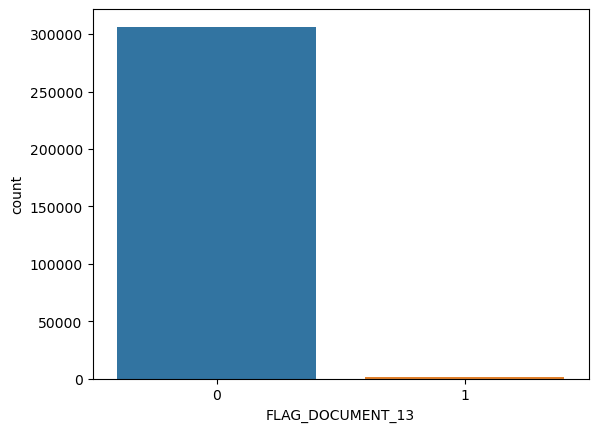

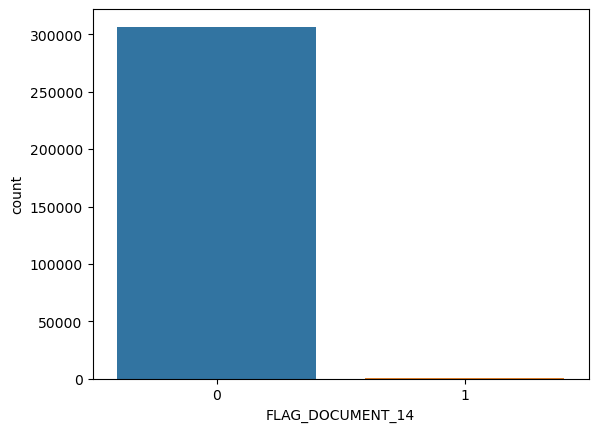

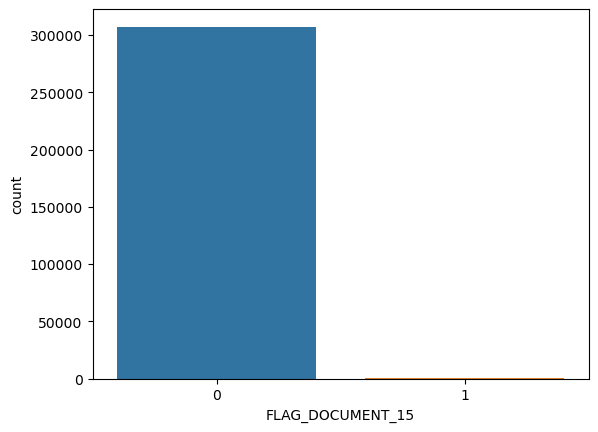

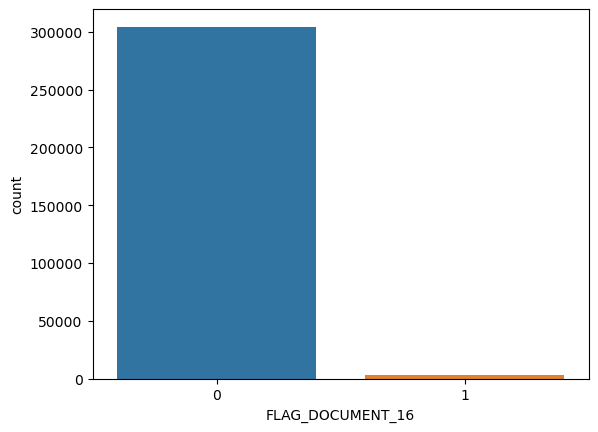

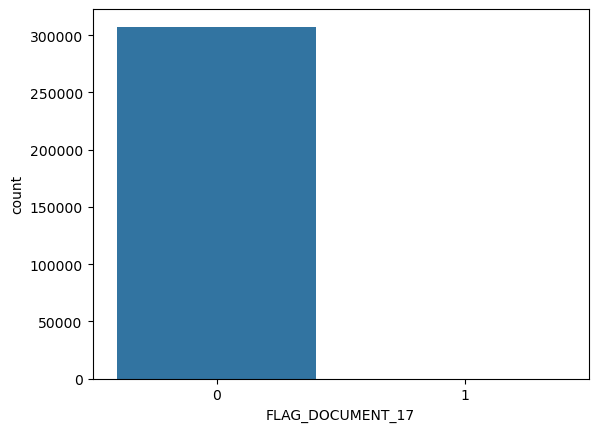

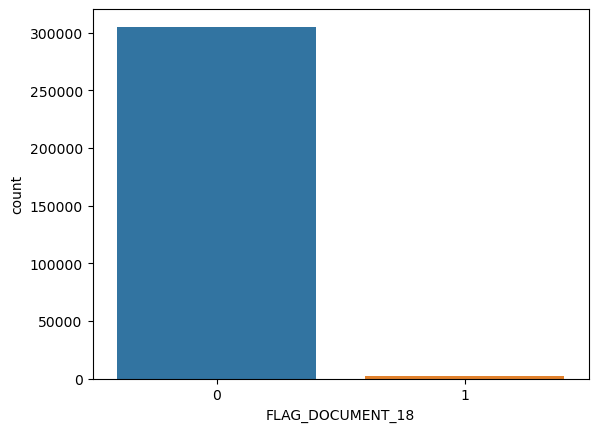

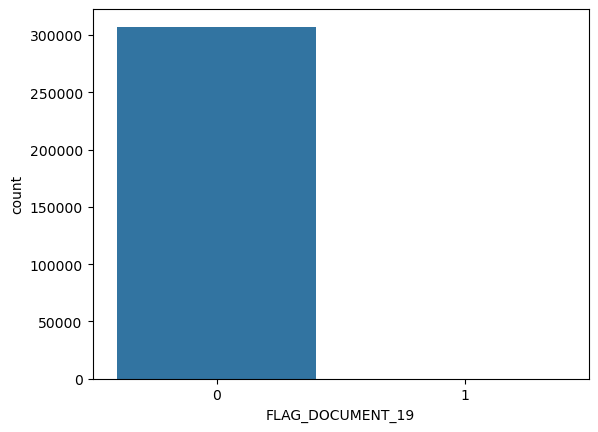

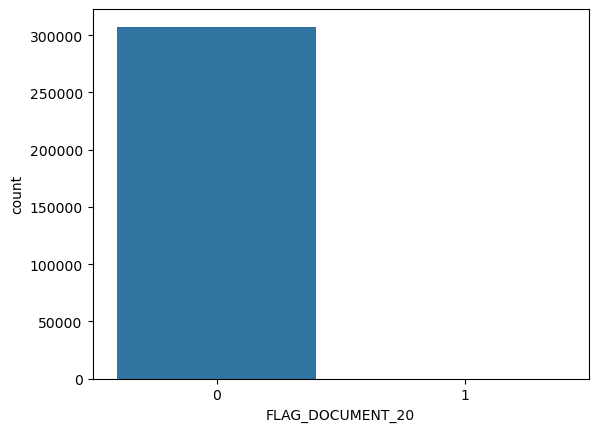

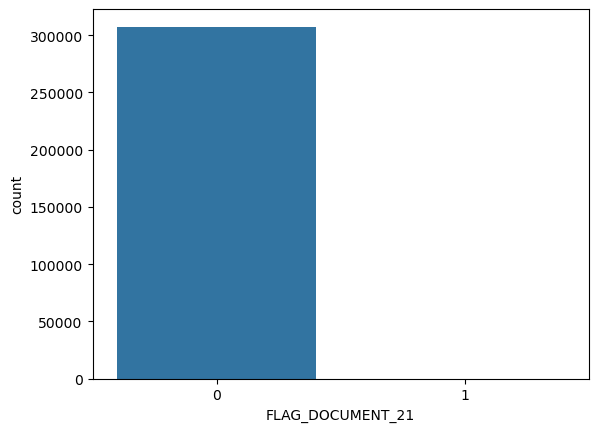

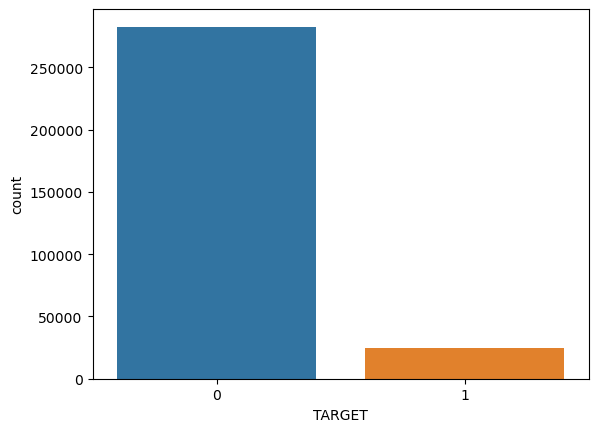

In [18]:
for i,feature in enumerate(flag_target_column):
    plt.figure(i)
    sns.countplot(df[flag_target_column],x= feature,)

In [19]:
# find correlation among numerical column
flag_corr= ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
     'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
corr_df= df[flag_corr]

In [20]:
corr_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [21]:
corr_df.groupby("FLAG_OWN_CAR").size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [22]:
corr_df.columns

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'TARGET'],
      dtype='object')

In [23]:
corr_df.FLAG_OWN_REALTY.value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

In [24]:
corr_df["FLAG_OWN_CAR"]= corr_df["FLAG_OWN_CAR"].replace({"N":0,"Y":1})
corr_df["FLAG_OWN_REALTY"]= corr_df["FLAG_OWN_REALTY"].replace({"N":0,"Y":1})

C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_13864\2440784917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df["FLAG_OWN_CAR"]= corr_df["FLAG_OWN_CAR"].replace({"N":0,"Y":1})
C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_13864\2440784917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df["FLAG_OWN_REALTY"]= corr_df["FLAG_OWN_REALTY"].replace({"N":0,"Y":1})


In [25]:
corr_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,0,1,1,1,0,1,1,0,1
1,0,0,1,1,0,1,1,0,0
2,1,1,1,1,1,1,1,0,0
3,0,1,1,1,0,1,0,0,0
4,0,1,1,1,0,1,0,0,0


In [26]:
corr_df.groupby("FLAG_OWN_CAR").size()

FLAG_OWN_CAR
0    202924
1    104587
dtype: int64

In [27]:
corr_mat= round(corr_df.corr(),2)

<Axes: >

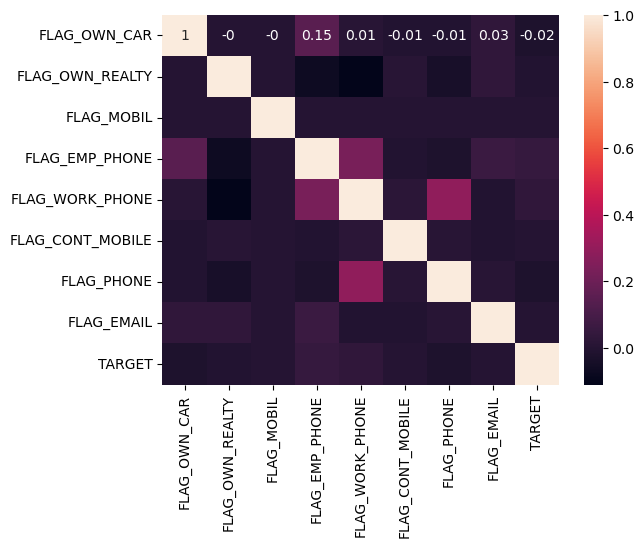

In [28]:
sns.heatmap(corr_mat,annot= True)

In [29]:
df.drop(flag_column,axis= 1,inplace= True)

<Axes: >

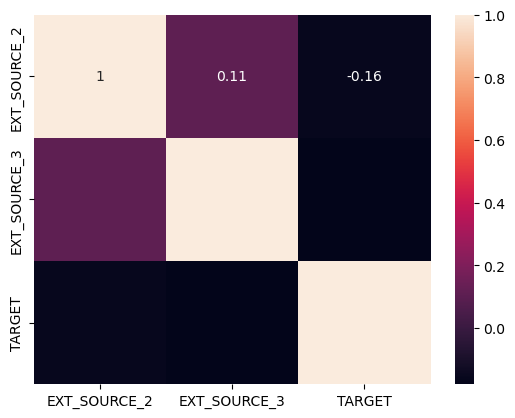

In [30]:
sns.heatmap(data= round(df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),annot= True)

In [31]:
df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis= 1,inplace= True)

# feature engineering

In [32]:

df.isnull().sum().sort_values()/len(df)

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


# missing imputation

In [33]:
df["CNT_FAM_MEMBERS"]= df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode()[0])

In [34]:
df["CNT_FAM_MEMBERS"].isnull().sum()

0

In [35]:
df["OCCUPATION_TYPE"]= df["OCCUPATION_TYPE"].fillna(df["OCCUPATION_TYPE"].mode()[0])
df["NAME_TYPE_SUITE"]= df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode()[0])
df["AMT_ANNUITY"]= df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].mean())

In [36]:
amt_req_column= list(feature for feature in df.columns if feature.startswith("AMT_REQ_CREDIT_BUREAU"))

In [37]:
amt_req_column

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [38]:
for column in amt_req_column:
    df[column]= df[column].fillna(df[column].median())

In [39]:
df["AMT_GOODS_PRICE"]= df["AMT_GOODS_PRICE"].fillna(df.AMT_GOODS_PRICE.median())

In [40]:
df.AMT_GOODS_PRICE.isnull().sum()

0

# value modification

In [41]:
days_column= list(feature for feature in df.columns if feature.startswith("DAYS"))

In [42]:
days_column

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [43]:
for column in days_column:
    df[column]= abs(df[column])


In [44]:
df["OBS_30_CNT_SOCIAL_CIRCLE"].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

# outlier detection treatment

In [45]:
numerical_feature= [feature for feature in df.columns if (df[feature].nunique() > 25) & (feature != 'SK_ID_CURR')]

In [46]:
df[numerical_feature].nunique()

AMT_INCOME_TOTAL               2548
AMT_CREDIT                     5603
AMT_ANNUITY                   13673
AMT_GOODS_PRICE                1002
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    17460
DAYS_EMPLOYED                 12574
DAYS_REGISTRATION             15688
DAYS_ID_PUBLISH                6168
ORGANIZATION_TYPE                58
OBS_30_CNT_SOCIAL_CIRCLE         33
OBS_60_CNT_SOCIAL_CIRCLE         33
DAYS_LAST_PHONE_CHANGE         3773
dtype: int64

# binning 

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AMT_GOODS_PRICE'>

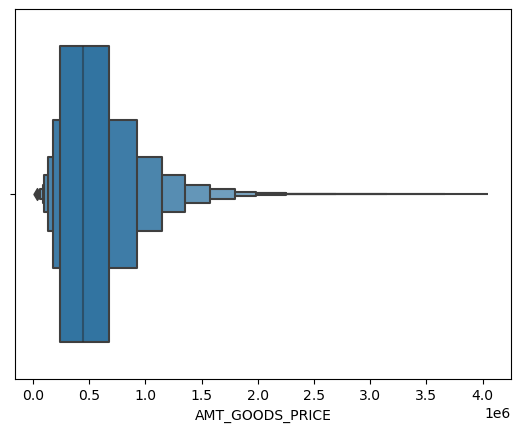

In [47]:
sns.boxenplot(df,x="AMT_GOODS_PRICE")

In [48]:
df.AMT_GOODS_PRICE.agg(["min","max","median"])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [49]:
df.AMT_GOODS_PRICE.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [50]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

In [51]:
df['AMT_GOODS_PRICE_RANGE']= pd.cut(df["AMT_GOODS_PRICE"],bins= bins,labels= ranges)

In [52]:
df.groupby("AMT_GOODS_PRICE_RANGE").size()

C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_13864\7427600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AMT_GOODS_PRICE_RANGE").size()


AMT_GOODS_PRICE_RANGE
0-100K         8709
100k-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [53]:
df.AMT_INCOME_TOTAL.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
df.AMT_INCOME_TOTAL.agg(["min","max","median"])

min           25650.0
max       117000000.0
median       147150.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [55]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

In [56]:
df["AMT_INCOME_TOTAL_RANGE"]= pd.cut(df["AMT_INCOME_TOTAL"],bins= bins,labels= ranges)

In [57]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']


In [58]:
df["AMT_CREDIT_RANGE"]= pd.cut(df["AMT_CREDIT"],bins= bins,labels= ranges)

In [59]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

In [60]:
df["AMT_ANNUITY_RANGE"]= pd.cut(df["AMT_ANNUITY"],bins= bins,labels= ranges)

In [61]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

In [62]:
df['DAYS_EMPLOYED_RANGE'] = pd.cut(df['DAYS_EMPLOYED'],bins,labels=ranges)

In [63]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

In [64]:
df["DAYS_BIRTH_RANGE"]= pd.cut(df["DAYS_BIRTH"],bins= bins,labels= ranges)

In [65]:
df.shape

(307511, 49)

# data analysis

In [66]:
object_column= df.select_dtypes(include= ["O"]).columns

In [67]:
object_column

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [68]:
df.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [69]:
data_pct= df[["NAME_CONTRACT_TYPE","TARGET"]].groupby(['NAME_CONTRACT_TYPE'],as_index= False).mean().sort_values(by= "TARGET",ascending= False)

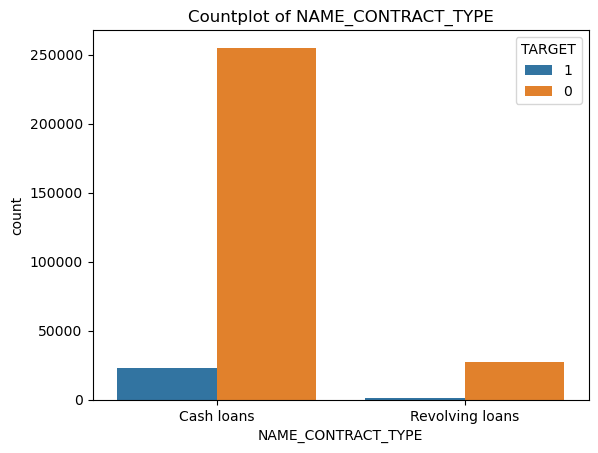

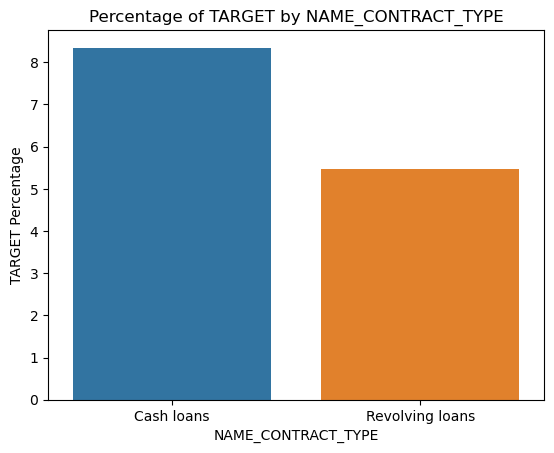

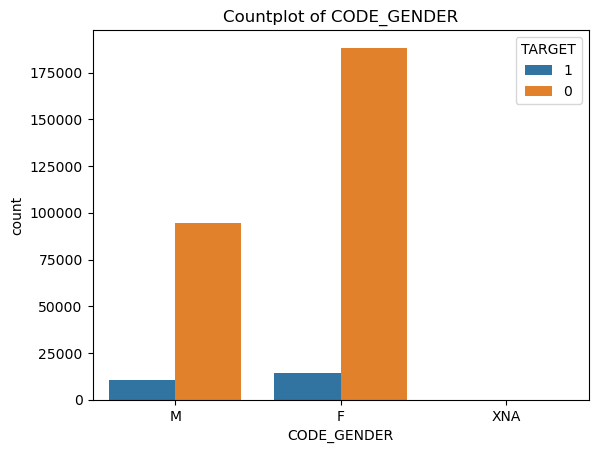

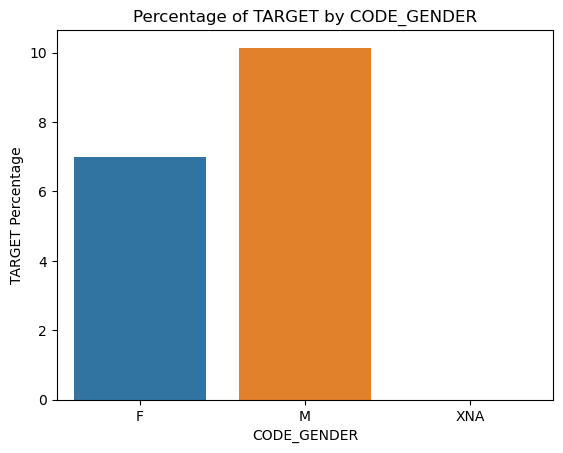

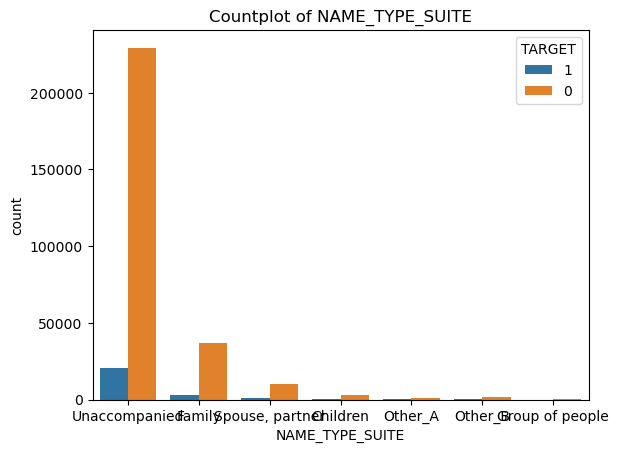

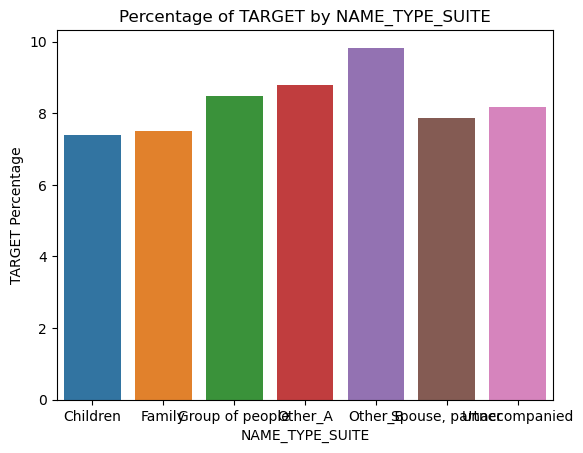

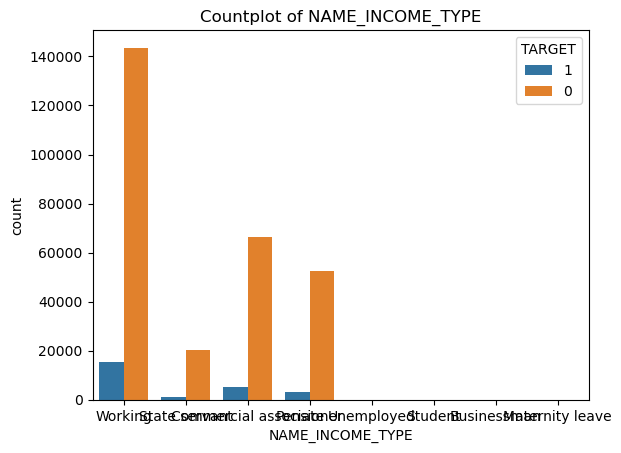

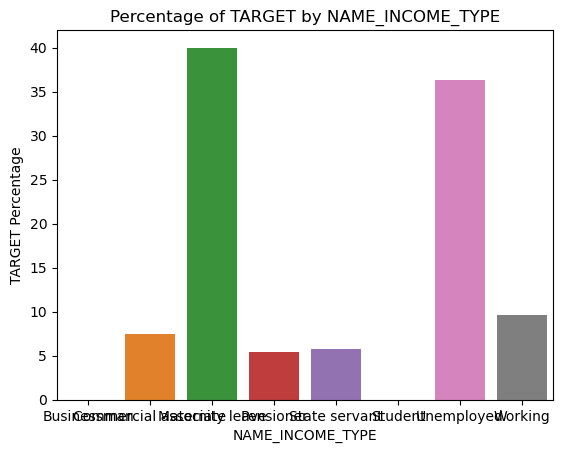

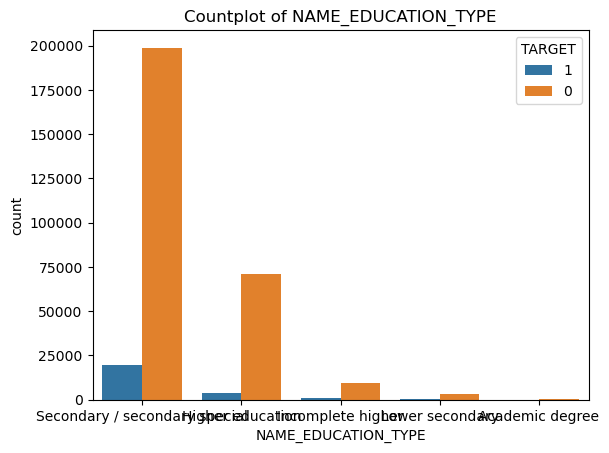

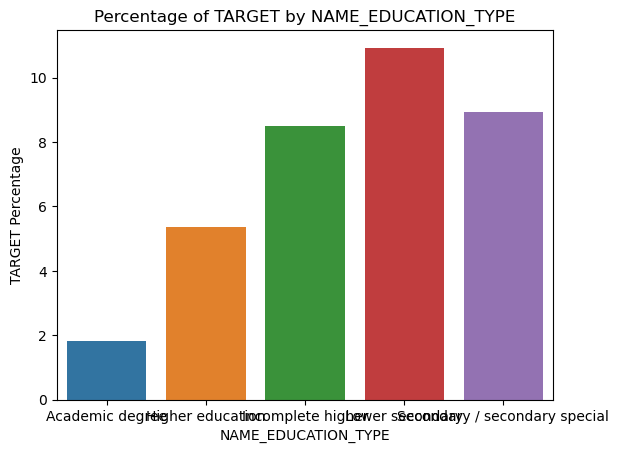

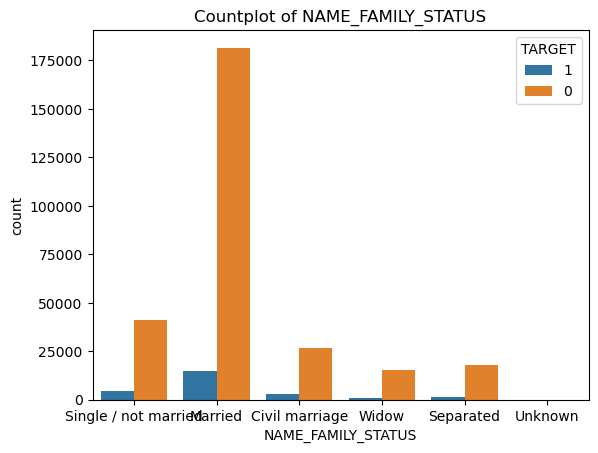

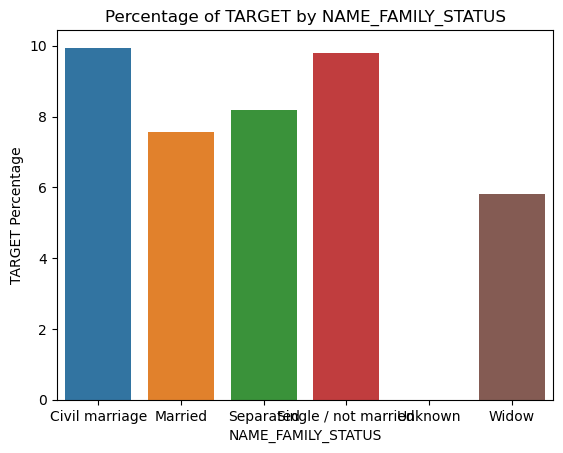

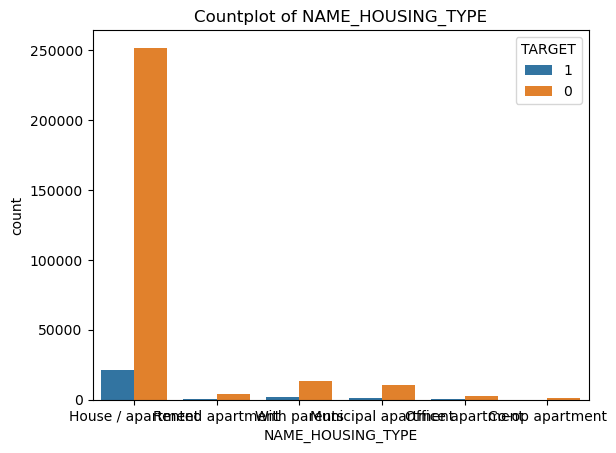

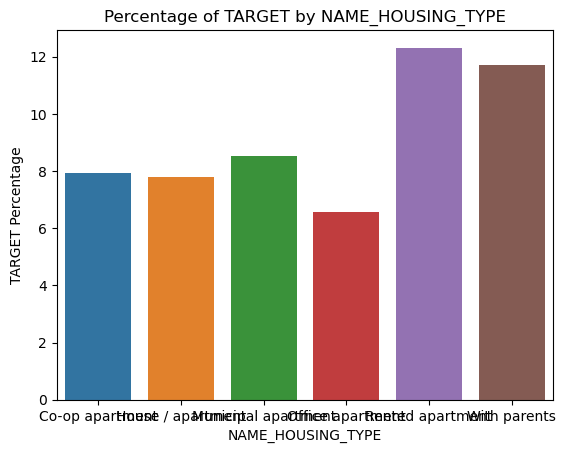

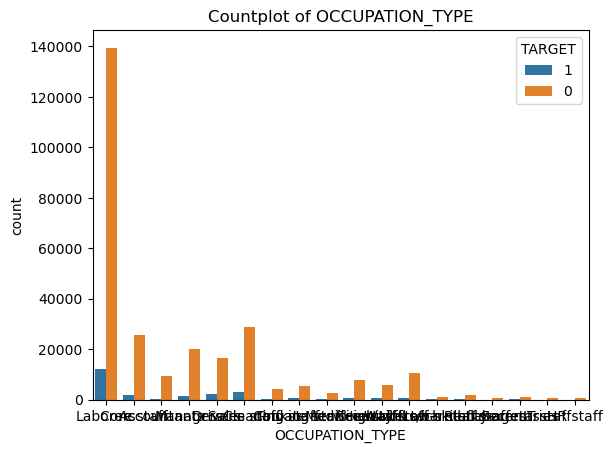

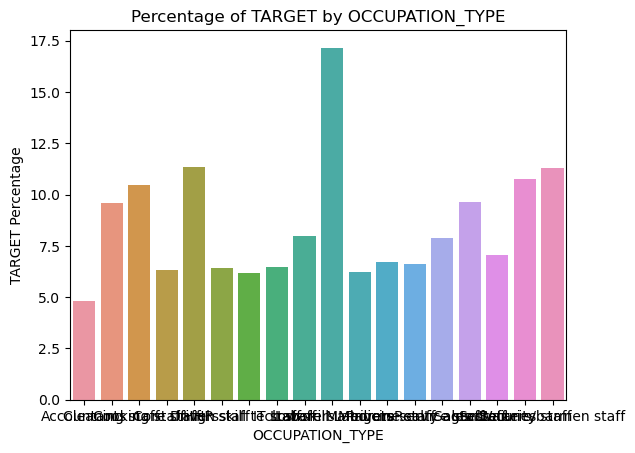

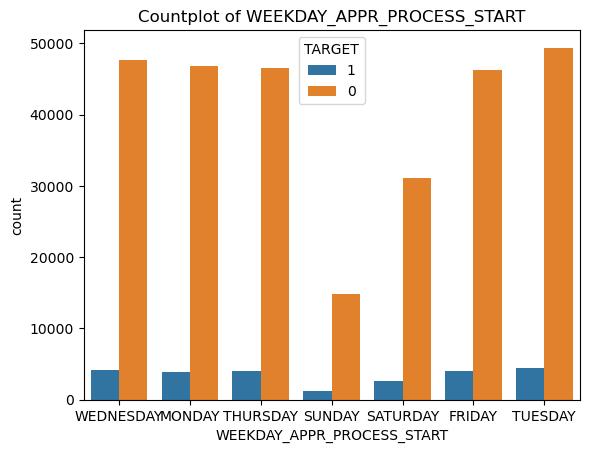

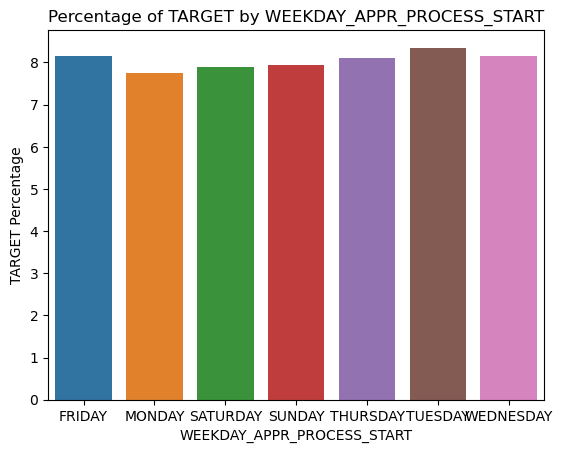

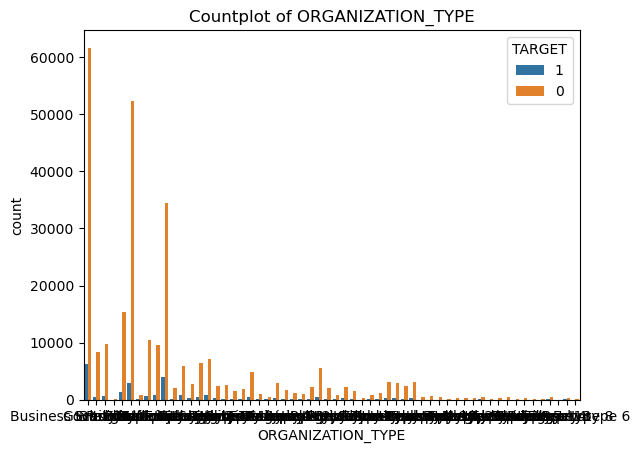

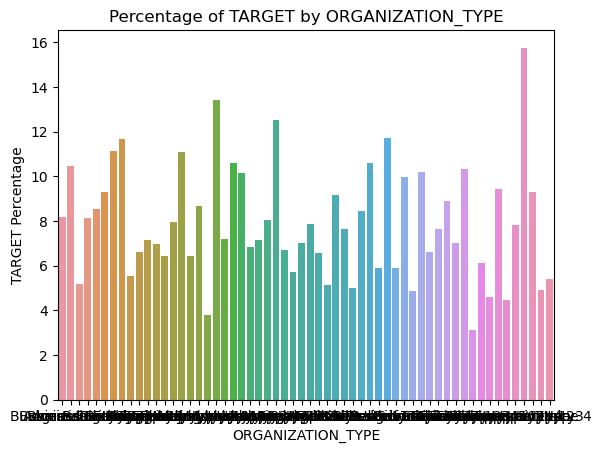

In [70]:
for i, feature in enumerate(object_column):
    # convert the feature back to intger
    df["TARGET"]= df["TARGET"].astype(int)
    
    # Calculate the percentage of TARGET for each feature category
    data_pct = df[[feature, "TARGET"]].groupby([feature], as_index=False).mean()
    data_pct['pct'] = data_pct['TARGET'] * 100  

    # convert the feature into object to make it compatible with matplotlib
    df["TARGET"]= df["TARGET"].astype(str)
    # Plot the countplot
    plt.figure(i)
    sns.countplot(data=df, x=feature,hue= "TARGET")
    plt.title(f'Countplot of {feature}')

    # Plot the barplot of percentages
    plt.figure(i + 1)
    sns.barplot(data=data_pct, x=feature, y="pct")
    plt.title(f'Percentage of TARGET by {feature}')
    plt.ylabel('TARGET Percentage')
    plt.show()
    

In [71]:
df["TARGET"]= df["TARGET"].astype(int)

In [72]:
numerical_feature

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [73]:
numeric_column= df.select_dtypes(include= ["float","int"]).columns

In [74]:
numeric_category_column= df.select_dtypes(include= ["float","int","category"]).columns

In [75]:
# separate the column into defaulters and repayers
numerical_data= df[numeric_column]
defaulters= numerical_data[numerical_data["TARGET"]==1]
repayers= numerical_data[numerical_data["TARGET"]==0]

In [76]:
def_corr= defaulters.corr()

In [77]:
defaulter_corr_unstck = def_corr.where(np.triu(np.ones(def_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})

In [78]:
defaulter_corr_unstck["corr"]= abs(defaulter_corr_unstck["corr"])

In [79]:
defaulter_corr_unstck.dropna(subset= ["corr"]).sort_values(by= "corr",ascending= False).head(10)

,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
202,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
169,AMT_ANNUITY,AMT_CREDIT,0.752195
305,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [80]:
repayers_corr= repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
repayers_corr_unstck["corr"]= abs(repayers_corr_unstck["corr"])
repayers_corr_unstck.dropna(subset= "corr").sort_values(by= "corr",ascending= False).head()

,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
202,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861


In [81]:
amt_var= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

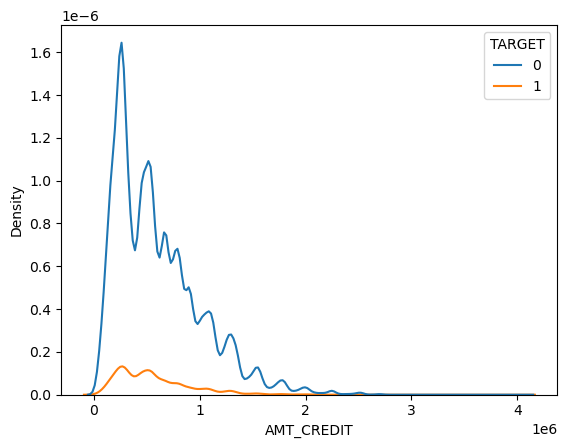

In [82]:
sns.kdeplot(data= numerical_data,x= "AMT_CREDIT",hue= "TARGET")

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

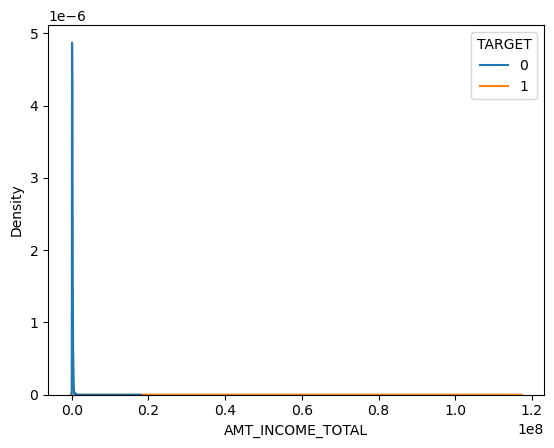

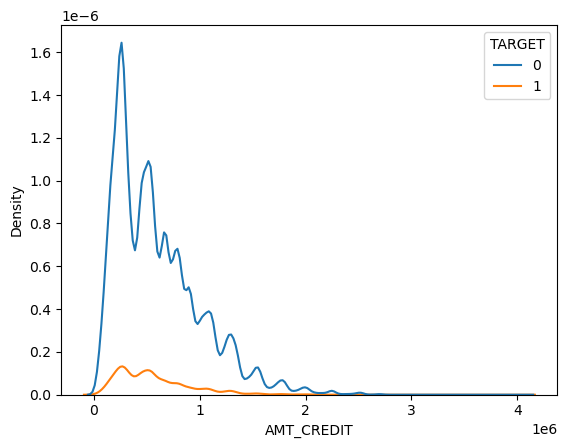

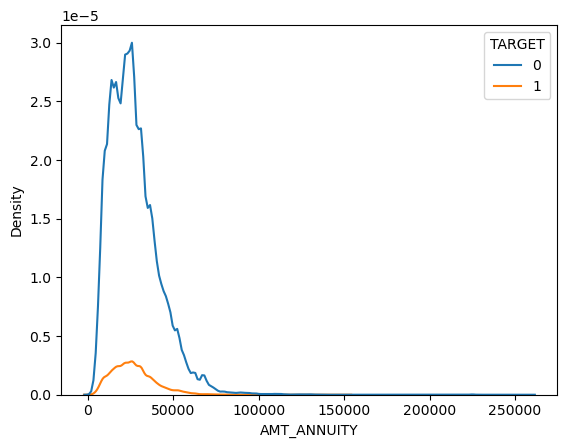

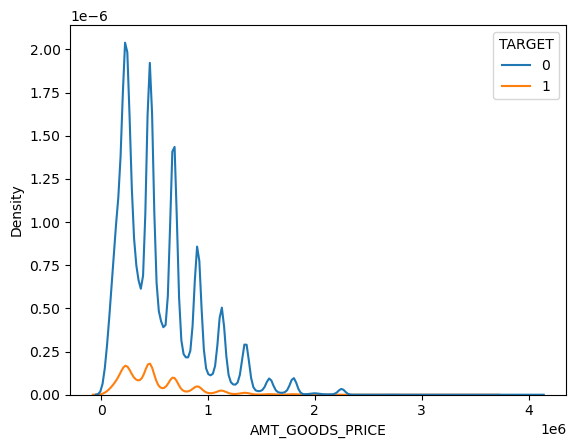

In [83]:
for i,col in enumerate(amt_var):
    df["TARGET"]= df["TARGET"].astype(str)
    plt.figure()
    sns.kdeplot(data= numerical_data,x= col,hue= "TARGET")

In [84]:
df.AMT_INCOME_TOTAL.dtype

dtype('float64')

In [85]:
df["TARGET"]= df["TARGET"].astype(int)

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

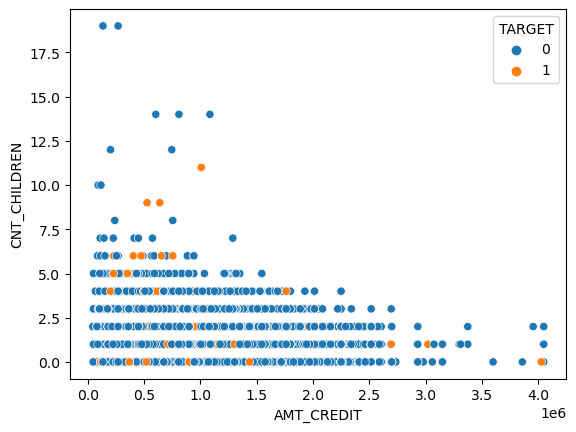

In [86]:
sns.scatterplot(data=numerical_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [87]:
amt_var = numerical_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

In [88]:
df2= pd.read_csv("C:\\exploratory data analysis\\datasets\\previous_application.csv")

In [89]:
null_count= pd.DataFrame(df2.isnull().sum().sort_values(ascending= False)/len(df2) * 100).reset_index().rename(columns= {"index":"var",
                                                                                                                        0:"count_pct"})

In [90]:
var_missing_40=list(null_count[null_count["count_pct"]>=40]["var"])

In [91]:
null_value_cols = var_missing_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [92]:
len(null_value_cols)

15

In [93]:
df2= df2.drop(null_value_cols,axis= 1)

In [94]:
len(df2.columns) 

22

In [95]:
df2.isnull().sum().sort_values(ascending=False)/df2.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [96]:
df2["AMT_GOODS_PRICE"].agg(func= ["mean","median"])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [97]:
df2['AMT_GOODS_PRICE_MEDIAN'] = df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].median())
df2['AMT_GOODS_PRICE_MEAN'] = df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].mean())
df2['AMT_GOODS_PRICE_MODE'] = df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].mode()[0])

In [98]:
goods_price_columns= ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

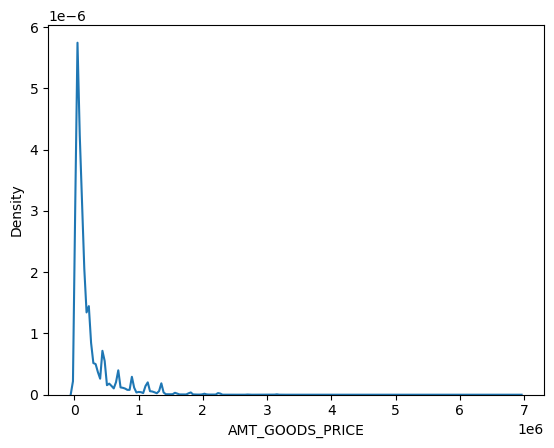

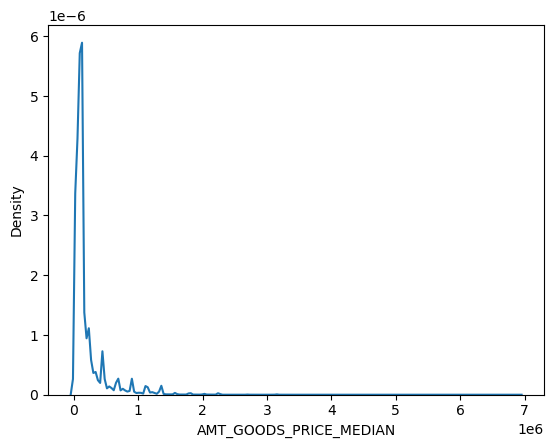

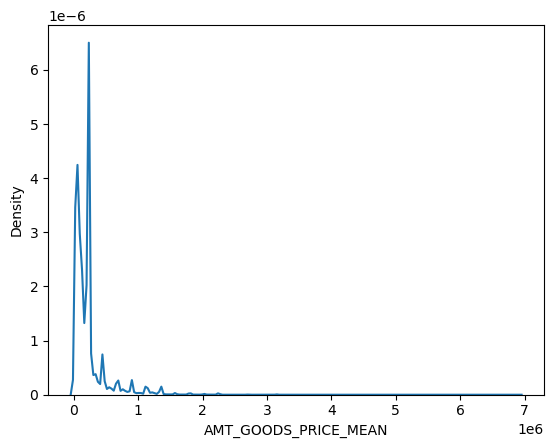

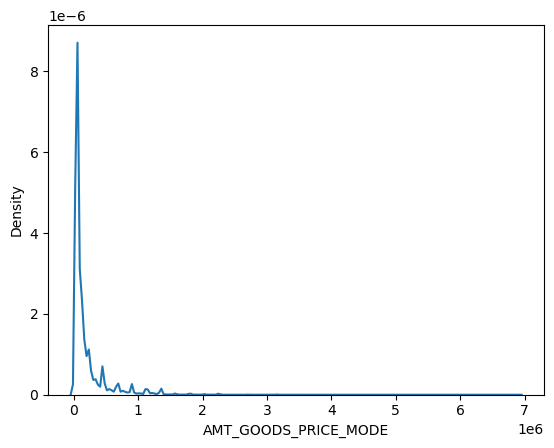

In [99]:
for i,column in enumerate(goods_price_columns):
    plt.figure()
    sns.kdeplot(data= df2,x= column)

In [100]:
df2['AMT_GOODS_PRICE'] = df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].median())

In [101]:
df2["AMT_ANNUITY"].agg(func= ["mean","median","max"])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [102]:
df2['AMT_ANNUITY'] = df2['AMT_ANNUITY'].fillna(df2['AMT_ANNUITY'].median())

In [103]:
df2['PRODUCT_COMBINATION'] = df2['PRODUCT_COMBINATION'].fillna(df2['PRODUCT_COMBINATION'].mode()[0])

In [104]:
df2['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [105]:
df2[df2["CNT_PAYMENT"].isnull()].groupby("NAME_CONTRACT_STATUS").size().sort_values(ascending= False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [106]:
df2["CNT_PAYMENT"]= df2["CNT_PAYMENT"].fillna(0)

In [107]:
df2= df2.drop(['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'], axis= 1)

In [108]:
merged_df= pd.merge(df,df2,how= "inner",on= "SK_ID_CURR")

In [109]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


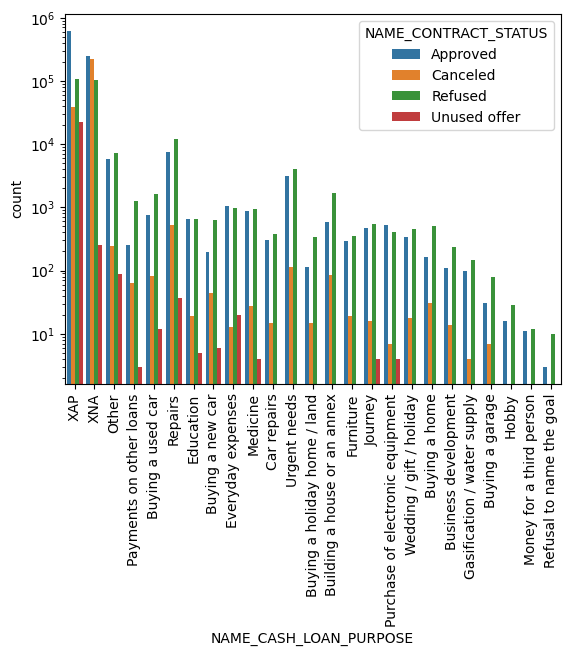

In [110]:
plt.figure()
sns.countplot(data= merged_df,x= 'NAME_CASH_LOAN_PURPOSE',hue= "NAME_CONTRACT_STATUS")
plt.xticks(rotation= 90)
plt.yscale("log")

In [111]:
merged_aggregate= merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns= {0:"counts"})


In [112]:
sum_df= merged_aggregate.groupby('NAME_CONTRACT_STATUS')["counts"].sum().reset_index()

In [113]:
merged_aggregate2= pd.merge(merged_aggregate,sum_df,how= "left",on= "NAME_CONTRACT_STATUS")

In [114]:
merged_aggregate2.head()

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y
0,Approved,0,818856,886099
1,Approved,1,67243,886099
2,Canceled,0,235641,259441
3,Canceled,1,23800,259441
4,Refused,0,215952,245390


In [115]:
merged_aggregate2["pct"]= round(merged_aggregate2["counts_x"]/merged_aggregate2["counts_y"] * 100,2)

In [116]:
merged_aggregate2.head()

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00


C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

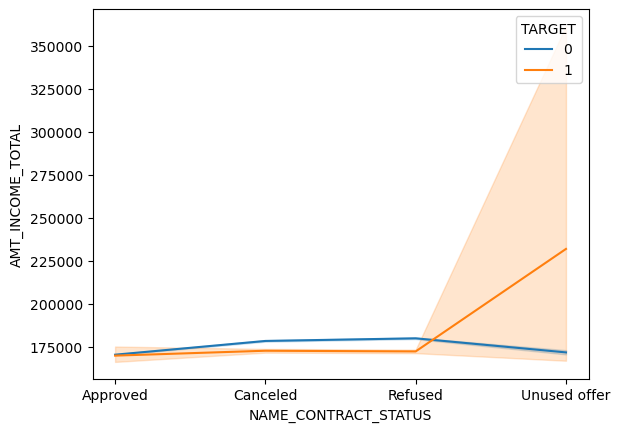

In [118]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',hue='TARGET')